In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs=64

In [4]:
path = "E:/Deep_Learning/Data/football_data/data"

In [5]:
files = os.listdir(f'{path}')[:5]
files

['football_001.jpg',
 'football_002.jpg',
 'football_003.jpg',
 'football_004.jpg',
 'football_005.jpg']

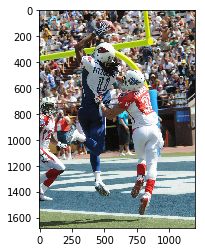

In [6]:
img = plt.imread(f'{path}/{files[0]}')
plt.imshow(img);

In [7]:
img.shape

(1680, 1200, 3)

In [8]:
fnames = get_image_files(path)
fnames[:5]

[WindowsPath('E:/Deep_Learning/Data/football_data/data/football_001.jpg'),
 WindowsPath('E:/Deep_Learning/Data/football_data/data/football_002.jpg'),
 WindowsPath('E:/Deep_Learning/Data/football_data/data/football_003.jpg'),
 WindowsPath('E:/Deep_Learning/Data/football_data/data/football_004.jpg'),
 WindowsPath('E:/Deep_Learning/Data/football_data/data/football_005.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+(.jpg|.png|.JPG|.jpeg)$'

In [10]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0
                                  ).normalize(imagenet_stats)

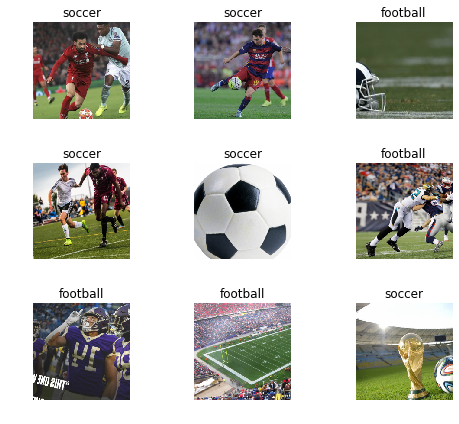

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['football', 'soccer']


(2, 2)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.model.cuda

<bound method Module.cuda of Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.939702,0.886215,0.555556,00:16
1,0.855163,0.338887,0.185185,00:12
2,0.696617,0.204751,0.074074,00:11
3,0.565094,0.165415,0.037037,00:10


In [17]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

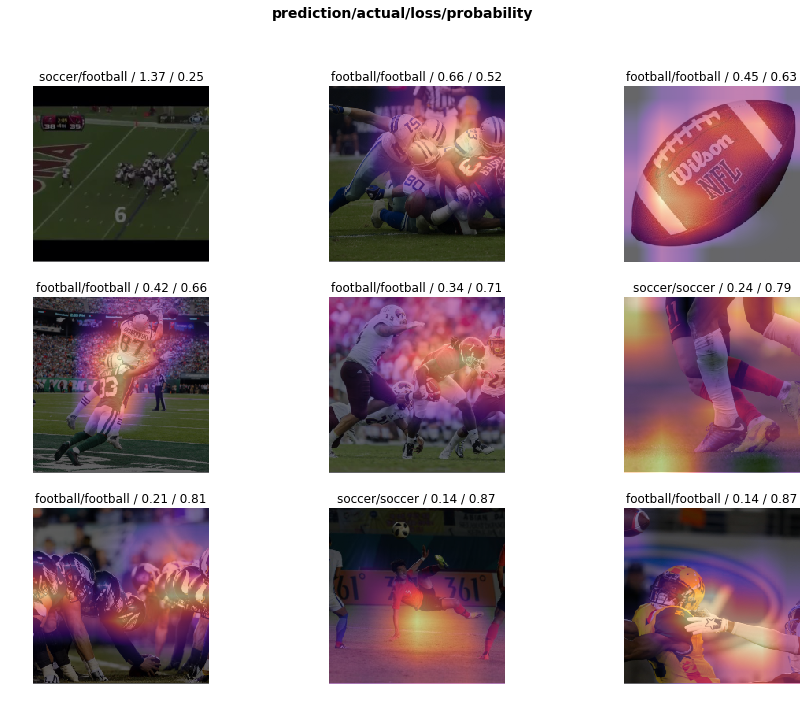

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [20]:
interp.most_confused(min_val=2)

[]

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.118485,0.188949,0.074074,00:12


In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


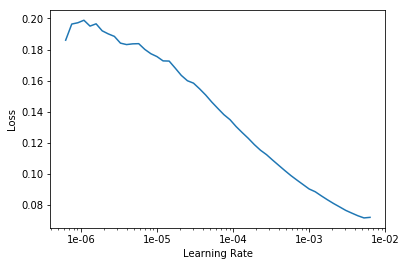

In [23]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.158016,0.174768,0.037037,00:09
1,0.166209,0.165112,0.037037,00:09


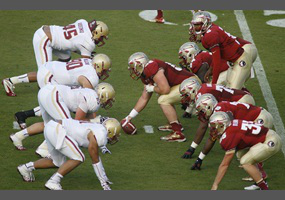

In [31]:
img = open_image('C:/Users/FAR3S/Downloads/ft.jpg')
img

In [32]:
pred_class,pred_idx,outputs = learn.predict(img)

In [33]:
pred_class

Category football

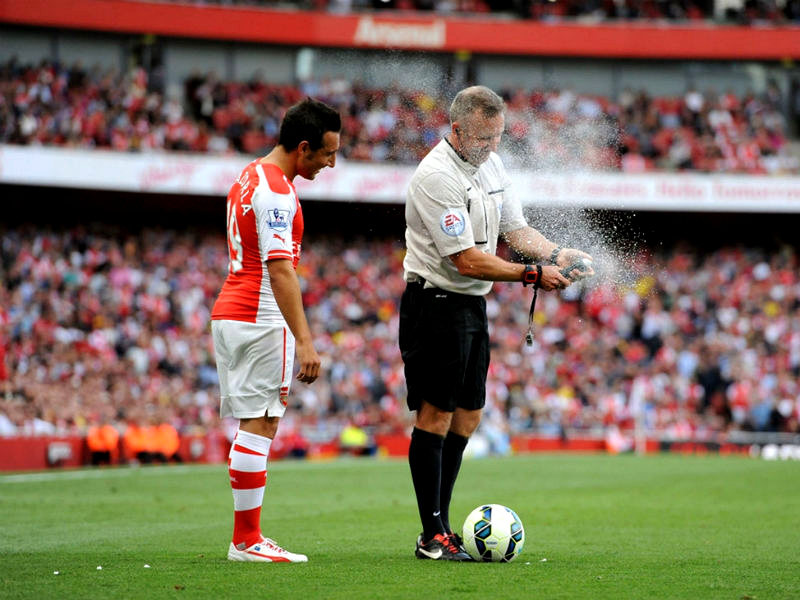

In [34]:
img = open_image('C:/Users/FAR3S/Downloads/sc1.jpg')
img

In [35]:
pred_class,pred_idx,outputs = learn.predict(img)

In [36]:
pred_class

Category soccer

#Let's make it harder for it by choosing an ambiguous photo 

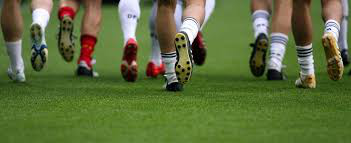

In [37]:
img = open_image('C:/Users/FAR3S/Downloads/sc.jpg')
img

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)

In [39]:
pred_class

Category soccer

Although this is soccer yesterday it showed me football without finetuning :)